In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from collections import Counter

# sklearn #from sklearn import metrics
from sklearn.model_selection import train_test_split, ParameterGrid, cross_val_score, learning_curve, ShuffleSplit
from sklearn.metrics import average_precision_score, mean_absolute_error, roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve

import seaborn as sns

# inspect
from inspect import signature

# internal modules
from functions.filter_complainers import filter_complainers
from functions.read_data import benchmark_reader
from functions.features import define_features, edit_features
from functions.check_nan import just_check_nan, fix_nan
from functions.target import y_target
from functions.var_type import var_cat, var_num, cat_less_three, cat_more_three
from functions.pipeline import f_pipeline
from functions.grid_search import grid_search
from functions.plot_learning_curve import plot_learning_curve, plot_learned
from functions.model import tunning
from functions.feature_select import recursive_feature_elimination, select_from_model
from functions.metrics import conf_matrix, aucur, precision_recall_curve, roc_curves

from scikitplot.metrics import plot_confusion_matrix, plot_roc
from scikitplot.estimators import plot_feature_importances

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import os

os.chdir('D:/Meus documentos/Trabalhos/python/exercicios/exemplaria/turma-2019-1/data/raw/')
print('LOCAL DE DATABASES')
print()
print(os.getcwd())
print()
print('LISTA DE DATABASES \n\n -', end ='')
print(*os.listdir(), sep = '\n -')

Using TensorFlow backend.


LOCAL DE DATABASES

D:\Meus documentos\Trabalhos\python\exercicios\exemplaria\turma-2019-1\data\raw

LISTA DE DATABASES 

 -amostra_benchmark_20170930.csv
 -anatel_exemplaria.csv
 -anatel_utf8.csv
 -benchmark_20170930_exemplaria.csv
 -benchmark_20171105_exemplaria.csv
 -cliente_cobranca_multas_fidelizacao_201709_201801_encrypted.csv
 -cliente_ebill_201709_201801_encrypted.csv
 -consumidor_gov_exemplaria.csv
 -count_plot.png
 -jec_exemplaria.csv
 -nextel_test.csv
 -premissas_base_fidelizados_201709_201801_encrypted.csv
 -PREMISSAS_BASE_FRANQUIA_20170701_20181231.csv
 -PREMISSAS_BASE_REDE_VIVO_20170901_20171231.csv
 -premissas_customer_exemplaria.csv
 -procon_exemplaria.csv
 -procon_exemplaria_v2.csv
 -ricardo_jec_processo_v2_csv_encrypted.csv
 -sample.csv


***
# 1) Filtrar os usuários reclamantes por cpf e cnpj


- **Extração de dados das planilhas**

In [2]:
# path
jec_exemplaria = 'jec_exemplaria.csv'
anatel_exemplaria = 'anatel_utf8.csv'
consumidor_gov_exemplaria = 'consumidor_gov_exemplaria.csv'
procon_exemplaria = 'procon_exemplaria_v2.csv'

benchmark = 'benchmark_20171105_exemplaria.csv'
benchmark2 = 'benchmark_20170930_exemplaria.csv'

* **Reunião dos databases**

In [3]:
df_complainers = filter_complainers(jec_exemplaria, 
                                    anatel_exemplaria, 
                                    consumidor_gov_exemplaria, 
                                    procon_exemplaria)                # filter_complainers

***
# 2) Linkar os databases com o benchmark com as features

* **Amostra de dados da base benchmark usando benchmark_reader function**

In [4]:
#Da base de 126303 clientes, 1371 deles são reclamantes, ou seja, 1.0855%
#clients = benchmark_reader([benchmark])  # read_data.py

# Da base de 250513 clientes, 2723 deles são reclamantes, ou seja, 1.0870%
#clients = benchmark_reader([benchmark, benchmark2])  # read_data.py
#clients

* **Salvar no arquivo checkpoint #1**

In [5]:
# save in the file
filename = '../intermediate/sample.csv'
#clients.to_csv(filename, index=False)
print('Saved file: ' + filename)

Saved file: ../intermediate/sample.csv


* **Carregar arquivo**

In [6]:
# reading file
clients_sample = pd.read_csv(filename, low_memory=False)

* **Definir as features usando define_features function**


https://docs.google.com/spreadsheets/d/1BFJUHenj_vQC8yS_Vhzoj9hkORohLEPJ/edit#gid=768356393

In [7]:
clients_sample = define_features(clients_sample) # features.py

* **Checar dados com Nan usando just_check_nan function**

In [8]:
just_check_nan(clients_sample) # check_nan.py

Dados com NaN:
Series([], dtype: int64)

columns_with_nan.shape (0,)



***
# 3) Corrigir dados faltantes NaN com fix_nan function

Para trabalhar com valores nulos usar o isna, muito util para determinar quantidade de NaN, e fillna para preencher valores faltantes

In [9]:
#clients_sample = fix_nan(clients_sample) # check_nan.py

* **Salvar no arquivo checkpoint #2**

In [10]:
# save in the file
filename_without_nan = '../intermediate/sample_without_nan.csv'
#clients_sample.to_csv(filename_without_nan, index=False)
print('Saved file: ' + filename_without_nan)

Saved file: ../intermediate/sample_without_nan.csv


* **Carregar arquivo**

In [11]:
# reading file
clients_sample = pd.read_csv(filename_without_nan, low_memory=False)

In [12]:
just_check_nan(clients_sample) # check_nan.py

Dados com NaN:
Series([], dtype: int64)

columns_with_nan.shape (0,)



***
# 4) Definição de target e features

https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

* **Target y function**

In [13]:
#y = y_target(clients_sample, df_complainers)  # target.py

* **Salvar no arquivo checkpoint #3**

In [14]:
# save in the file
target = '../intermediate/target.csv'
#np.savetxt(target, y, delimiter=",", fmt='%s')
print('Saved file: ' + target)

Saved file: ../intermediate/target.csv


* **Carregar arquivo**

In [15]:
# reading file Da base de 126303 clientes, 1371 deles são reclamantes, ou seja, 1.0855%
y = np.loadtxt(target, dtype=int).tolist()

print('Da base de ' + str(len(clients_sample)) + ' clientes, ' + str(Counter(y)[1]) + 
      ' deles são reclamantes, ou seja, %.4f' %float((Counter(y)[1]/len(clients_sample))*100) + '%')

Da base de 126303 clientes, 1371 deles são reclamantes, ou seja, 1.0855%


In [16]:
Counter(y)

Counter({0: 124932, 1: 1371})

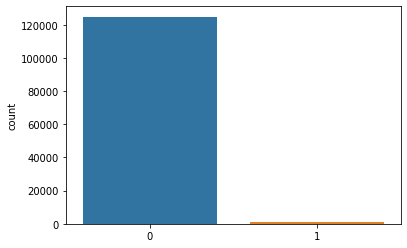

<Figure size 432x288 with 0 Axes>

In [17]:
sns.countplot(x=y, data=clients_sample)
plt.show()
plt.savefig('count_plot')

* **Features X**

In [18]:
X = clients_sample.drop(['cssocialsecno_encrypted'], axis=1)

In [19]:
X.groupby(y).mean()

,customer_tenure,port_in_flag,rate_plan_code,rateplan_fee,rateplan_discount_fee,rateplan_discount_qty,services_fee,services_discount_fee,services_discount_qty,m0_qt_involuntary_suspension,m0_qt_voluntary_suspension,nxt_3g_traffic_volume_m0,nxt_4g_traffic_volume_m0,vivo_traffic_volume_m0,m0_call_term_err,prop_legal_complaint_ticket_m0,billing_ticket_m0,contract_loyalty_flag
0,45.258385,0.240147,2261.642662,106.729041,32.980230,7.255435,17.550722,15.236981,4.723249,0.014520,0.000208,1.842274e+09,8.212733e+08,8.460852e+07,276.618472,0.000088,0.036860,0.588256
1,59.726780,0.213713,2276.082422,98.483027,31.670686,7.896426,19.507644,15.185828,4.419402,0.021152,0.001459,1.579244e+09,7.491833e+08,7.998123e+07,264.803063,0.017505,0.364697,0.571845


# 5) Variaveis categóricas - montar por categorias

* **Criando uma lista de variaveis categoricas**

In [20]:
object_cols = var_cat(X) # var_type.py

Categorical variables:  6


* Descrição das variáveis categoricas com no **máximo** 3 colunas. Nestas serão feitos one hot encoder diretamente

In [21]:
cat_less_three(object_cols, X) # var_type.py

Name:  person_type
Possui 2 categorias
['PF' 'PJ']

Name:  payment_method
Possui 2 categorias
['Boleto' 'Debito Automatico']

Name:  inar_rate_plan
Possui 2 categorias
['Y' 'N']

Name:  contract_status
Possui 2 categorias
['a' 's']



* Descrição das variáveis categoricas **acima** de 3 colunas. Nestas serão feitos uma reunião de categorias.

In [22]:
cat_more_three(object_cols, X) # var_type.py

Name:  contract_status_reason
Possui 29 categorias
['ativando' 'reativando' 'IN-Suspensão Parcial' 'Aparelho Localizado'
 'TAKEOVER' 'IN-Não Pagamento ' 'VO-Suspensao Roubo/Furto'
 'IN-Reativação 15 dias' 'VO-Suspensao Perda' 'VO-Suspensao 120 dias'
 'VO-Suspensão 30 dias' 'VO-Processando Cancelamento'
 'VO-Problemas financeiros/estrutural ' 'VO-Suspensao 90 dias'
 'FC-Regularização de Usuario' 'IN-Reativação 15 dias A'
 'FC-Fulfil/Trans Comodato/Locação ' 'Reativação Port-in' 'IN-Fraude '
 'Targys aguardando' 'VO-Suspensão Parcial Sem Cobrança'
 'VO-Falta orientação sobre serv/prod ' 'VO-Suspensao 60 dias'
 'Suspensao Port-in' 'RV-Devolução entrega/Recusa entrega '
 'VO-Planos de Serv/Prod da concor ' 'Should not display'
 'IN-Suspensão para Regularização' 'VO-Neces. novas áreas de cobertura ']

Name:  device_type_m0
Possui 11 categorias
['Smartphone' 'Handheld' 'Other' 'Portable(include PDA)' 'Tablet'
 'Mobile Phone/Feature phone' 'WLAN Router' 'Dongle' 'Modem' 'Vehicle'
 'Module']



* Filtrando as 31 categorias de 'contract_status_reason' em 3 no total.
* Substituição das 31 categorias em 3 no total.

In [23]:
edit_features(X) # features.py

* Nova checagem

In [24]:
cat_more_three(object_cols, X) # var_type.py

Name:  device_type_m0
Possui 11 categorias
['Smartphone' 'Handheld' 'Other' 'Portable(include PDA)' 'Tablet'
 'Mobile Phone/Feature phone' 'WLAN Router' 'Dongle' 'Modem' 'Vehicle'
 'Module']



# temp

# 6) train_test_split

In [25]:
# 70% for train data and 30% for test data SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.4,
                                                    random_state=42)

# 7) Pipeline

* **Criando uma lista de variaveis categoricas**

In [26]:
object_cols = var_cat(X_train)

Categorical variables:  6


* **Criando uma lista de variaveis numéricas**

In [27]:
numerical_cols = var_num(X_train)

Numerical variables:  18


* **Define Preprocessing Steps**, **Define the model** and **Create and Evaluate the Pipeline**

In [28]:
pipeline_all = f_pipeline(numerical_cols, object_cols)
pipeline = pipeline_all[0]

pipeline

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='constant',
                                                             

* **Model**

In [29]:
model = pipeline_all[1]
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# Fit

In [30]:
# Preprocessing of training data, fit model 
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=-1, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='constant',
                                                             

* **Recursive Feature Elimination - RFE**

* RFE é um método de seleção de recurso que se ajusta a um modelo e remove o (s) recurso (s) mais fraco (s) até que o número especificado de recursos seja atingido

In [31]:
#recursive_feature_elimination(X_train, y_train, model)

* **SelectFromModel**

In [32]:
#select_from_model(X_train, y_train, model)

# **Predict**

In [33]:
# Preprocessing of validation data, get predictions
preds = pipeline.predict(X_test)
preds

array([0, 0, 0, ..., 0, 0, 0])

In [34]:
print('X_train.shape: ', X_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_train.shape: ', len(y_train))
print('y_test.shape: ', len(y_test))
print()
print('y_train: ', Counter(y_train))
print('y_test: ', Counter(y_test))
print()
print('preds: ', Counter(preds))
# sem SMOTE preds:  Counter({0: 37866, 1: 25})
# com SMOTE preds:  Counter({0: 31246, 1: 6645})
# com NearMiss preds: Counter({1: 31986, 0: 5905})

X_train.shape:  (75781, 24)
X_test.shape:  (50522, 24)
y_train.shape:  75781
y_test.shape:  50522

y_train:  Counter({0: 74956, 1: 825})
y_test:  Counter({0: 49976, 1: 546})

preds:  Counter({0: 48904, 1: 1618})


# 8) Metricas

* **Cross validation**


* options
http://scikit-learn.org/stable/modules/model_evaluation.html

In [35]:
# Check the score on train and test
print('train score = ', pipeline.score(X_train, y_train))
print('test score  = ', pipeline.score(X_test, y_test))
print()

train score =  0.9624839999472163
test score  =  0.9621946874628875



* Plotting Learning Curves

https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

In [36]:
#plot_learned(model)

# mean_absolute_error - The best value is 0.0

In [37]:
# Evaluate the model
maer = mean_absolute_error(y_test, preds)
print('MAE:', maer)

MAE: 0.03780531253711254


# Confusion matrix

https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62

In [38]:
conf_matrix(y_test, preds)

preds:  Counter({0: 48904, 1: 1618})

               Actual Values
           +--------+--------+
           | Neg(0) | Pos(1) |
p +--------+--------+--------+
r | Neg(0) | 48485  | 1491   |
e +--------+--------+--------+
d | Pos(1) | 419    | 127    |
s +--------+--------+--------+


# Curva AUC-ROC - Diz quanto modelo é capaz de distinguir entre classes

https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

AUC: 0.601


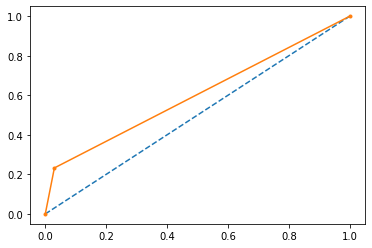

In [39]:
aucur(y_test, preds)

# Precision recall - é uma medida do sucesso da previsão quando as classes estão muito desequilibradas

* acurácia ((TP+TN)/(TP+FP+TN+FN))


* especificidade (TN/(TN+FP))

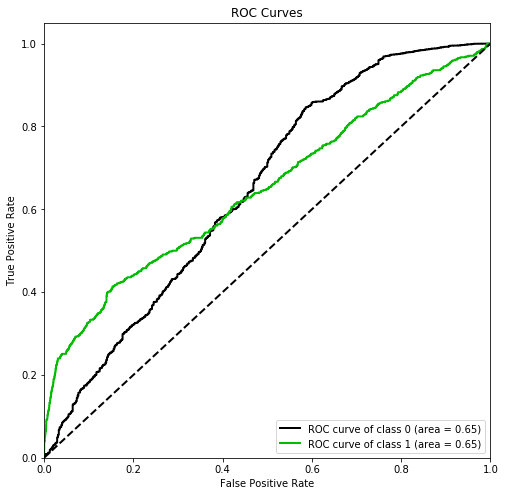

In [40]:
roc_curves(X_test, y_test, pipeline)

# Classification report

https://docs.google.com/document/d/1pjpX9xQPdVgeJjKakVSYuqRReEyrZesD3-aD61Z-0wQ/edit

In [41]:
# classification_report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     49976
           1       0.08      0.23      0.12       546

    accuracy                           0.96     50522
   macro avg       0.53      0.60      0.55     50522
weighted avg       0.98      0.96      0.97     50522



# plot_feature_importances